## Load run data
Run this block to load run data

In [2]:
import libutil.runs
import libutil.datasets
import libutil.models
import libutil.traders

from user_vars import USER_VARS

run_name = "intra-gmlp-testing"
run_file = None # will default to runs/sample_runs.json
run_data = libutil.runs.from_file(run_file, run_name, ALPHAVANTAGE_APIKEY=USER_VARS["ALPHAVANTAGE_APIKEY"])

dataset = libutil.datasets.from_run(run_data)

> Reading run file runs/sample_runs.json
Copying from run Intra-GMLP-TQQQ
Copying from run Intra-LSTM-TQQQ
> Running Intra-GMLP-Testing-TQQQ

[-8, -7, -6, -5, -4, -3, -2, -1, 0]


https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-04
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-05
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-06
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-07
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-08
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&exte

Loading indicators EMA,MACD,delta_close,log_vol
Processing 35028 values


100%|█████████████████████████████████| 35007/35007 [00:00<00:00, 670478.05it/s]


Processing 35028 values


100%|█████████████████████████████████| 35015/35015 [00:00<00:00, 357292.26it/s]

      Unnamed: 0           timestamp    open    high     low   close  volume   
3621        3621 2023-04-03 06:10:00  27.606  27.626  27.587  27.598   22986  \
3620        3620 2023-04-03 06:15:00  27.616  27.636  27.597  27.608   26267   
3619        3619 2023-04-03 06:20:00  27.616  27.626  27.597  27.618   16753   
3618        3618 2023-04-03 06:25:00  27.625  27.626  27.577  27.588   32121   
3617        3617 2023-04-03 06:30:00  27.596  27.616  27.577  27.598   49349   

      close_ema20  close_macd26  close_delta_close  close_log_vol  dt_hour  
3621    27.756263     -0.015782               0.01      10.042641        6  
3620    27.781857      0.435674               0.01      10.176069        6  
3619    27.804061      0.404662               0.01       9.726333        6  
3618    27.824151      0.375753              -0.03      10.377265        6  
3617    27.846041      0.351932               0.01      10.806673        6  



## Train & Load Model
Run this code to load a model from current run data and perform one training epoch

In [3]:
device = 'mps'
model = libutil.models.from_run(run_data, device=device)
model.standard_train(dataset)

> Model loader parameters:
Using model GatedMLP.
Using device mps.

> Model config: 
ModelConfig(loss='mean_squared_error', optimizer='adam', test_split=0.1, validation_split=0.2, batch_size=64, epochs=1, learning_rate=0.001, weight_decay=0.0001, hidden_layer_size=128, dropout_rate=0.0, seq_len=72, out_seq_len=1, precompile=False, pin_memory=True, indicators=[{'function': 'EMA', 'period': 20, 'is_input': True, 'is_scaled': True, 'name': 'close_ema20'}, {'function': 'MACD', 'period': 26, 'period2': 12, 'is_input': True, 'is_scaled': True, 'name': 'close_macd26'}, {'function': 'delta_close', 'is_input': True, 'name': 'close_delta_close'}, {'function': 'log_vol', 'is_input': True, 'name': 'close_log_vol'}], columns=[{'name': 'close', 'is_scaled': True}, {'name': 'dt_hour', 'is_scaled': True}, {'name': 'close_ema20', 'from_indicator': True, 'is_scaled': True}, {'name': 'close_macd26', 'from_indicator': True, 'is_scaled': True}, {'name': 'close_delta_close', 'from_indicator': True, 'is_scal

437/437 [██████████████████████████████] 00:11 - eta: 00:00, 37.80it/s
437/437 [██████████████████████████████] 00:48 - eta: 00:00,  9.02it/s, loss=0.006515, err($)=0.2948
110/110 [██████████████████████████████] 00:06 - eta: 00:00, 18.11it/s, val_loss=0.0005842, val_err($)=0.1085


Done in user: 66.08s; sys: 58.83s.



## Show dataset
Show this block to see a preview of the dataset

In [4]:
dataset.df
# dataset.df.iloc[0]

,Unnamed: 0,timestamp,open,high,low,close,volume,close_ema20,close_macd26,close_delta_close,close_log_vol,dt_hour
3621,3621,2023-04-03 06:10:00,27.606,27.626,27.587,-1.700416,22986,-1.674617,-0.097163,0.010,10.042641,-1.192313
3620,3620,2023-04-03 06:15:00,27.616,27.636,27.597,-1.698660,26267,-1.670115,2.345612,0.010,10.176069,-1.192313
3619,3619,2023-04-03 06:20:00,27.616,27.626,27.597,-1.696904,16753,-1.666209,2.177808,0.010,9.726333,-1.192313
3618,3618,2023-04-03 06:25:00,27.625,27.626,27.577,-1.702173,32121,-1.662675,2.021386,-0.030,10.377265,-1.192313
3617,3617,2023-04-03 06:30:00,27.596,27.616,27.577,-1.700416,49349,-1.658825,1.892496,0.010,10.806673,-1.192313
...,...,...,...,...,...,...,...,...,...,...,...,...
32188,4,2023-12-01 19:35:00,44.420,44.440,44.410,1.254072,3344,0.125707,-0.244743,-0.020,8.114923,1.633559
32187,3,2023-12-01 19:40:00,44.430,44.430,44.410,1.254072,1920,0.125688,-0.219071,0.000,7.560080,1.633559
32186,2,2023-12-01 19:45:00,44.420,44.430,44.400,1.251438,9147,0.126843,-0.166381,-0.015,9.121181,1.633559
32185,1,2023-12-01 19:50:00,44.410,44.430,44.400,1.255829,7737,0.129732,-0.075857,0.025,8.953769,1.633559


## Visualize predictions
Run this block to show a visualization of the predictions

### Training helper parameters

In [5]:

cutoff = 72 # how many of the real datapoints to cut off
test_len = 100 # how many inferences to make

### Training helper function

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import torch

def test():
    close_values = dataset.df['close'].iloc[cutoff:model.conf.seq_len].to_numpy()

    for i in range(test_len):
        X = torch.Tensor(dataset.df[model.conf.column_names].iloc[i:i+model.conf.seq_len].to_numpy()).to(device)
        Y = model.module.forward(X).squeeze(0)
        close_values = np.append(close_values, Y[0].item())

    times = pd.to_datetime(dataset.df['timestamp'][cutoff:model.conf.seq_len+test_len])

    myFmt = mdates.DateFormatter('%m/%d/%y %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    plt.xticks(rotation=45, fontweight='light',  fontsize='x-small', ha='right', rotation_mode='anchor')
    plt.plot(times, close_values, c='r')
    plt.plot(times, dataset.df['close'].iloc[cutoff:model.conf.seq_len+test_len])
    plt.show()

###

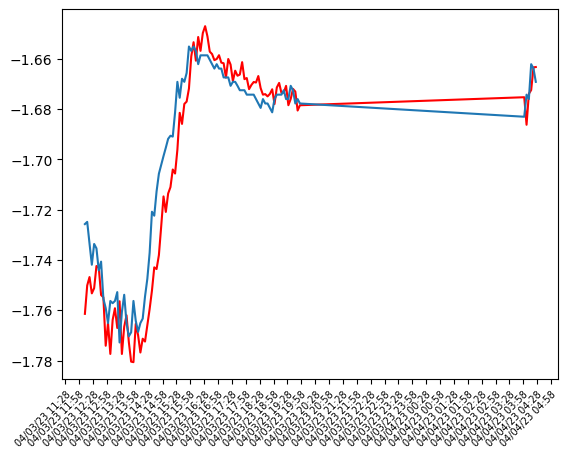

In [7]:
test()

## Visualize training
Run this block to show a visualization of the training and plot predictions at each step

> Training model GatedMLP.
Total trainable params: 978699

Splitting data at a 0.8 ratio: 27944/6986

Fitting dataset.
Before:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64
After:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64

Epoch 1/1; Total epochs: 2/2
GPU: 0.00MB Pinning


  0/437 [                              ] 00:00 - eta: ?, ?it/s

437/437 [██████████████████████████████] 00:11 - eta: 00:00, 36.96it/s
437/437 [██████████████████████████████] 00:44 - eta: 00:00,  9.89it/s, loss=0.0004458, err($)=0.01544
110/110 [██████████████████████████████] 00:05 - eta: 00:00, 18.69it/s, val_loss=0.0002323, val_err($)=0.01019 



Done in user: 61.91s; sys: 56.83s.



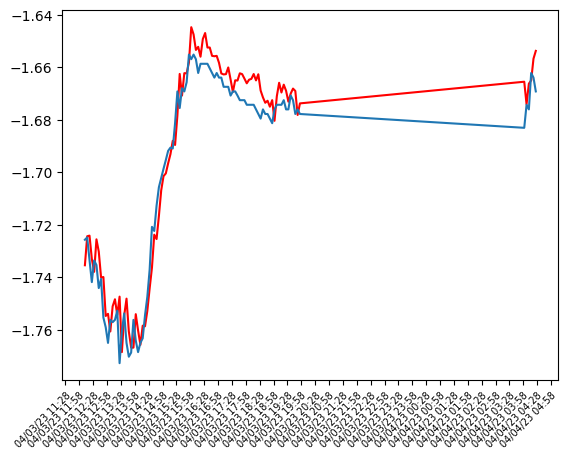

> Training model GatedMLP.
Total trainable params: 978699

Splitting data at a 0.8 ratio: 27944/6986

Fitting dataset.
Before:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64
After:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64

Epoch 1/1; Total epochs: 3/3
GPU: 0.00MB Pinning


437/437 [██████████████████████████████] 00:12 - eta: 00:00, 36.26it/s
437/437 [██████████████████████████████] 00:44 - eta: 00:00,  9.83it/s, loss=0.0004132, err($)=0.01457
110/110 [██████████████████████████████] 00:05 - eta: 00:00, 18.35it/s, val_loss=0.0002592, val_err($)=0.01135



Done in user: 62.51s; sys: 58.12s.



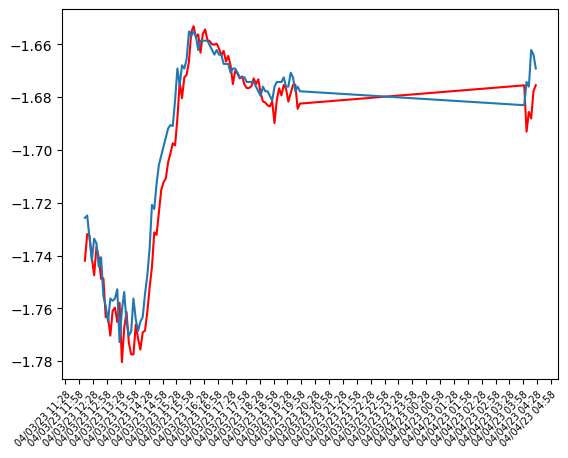

> Training model GatedMLP.
Total trainable params: 978699

Splitting data at a 0.8 ratio: 27944/6986

Fitting dataset.
Before:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64
After:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64

Epoch 1/1; Total epochs: 4/4
GPU: 0.00MB Pinning


437/437 [██████████████████████████████] 00:12 - eta: 00:00, 34.89it/s
437/437 [██████████████████████████████] 00:44 - eta: 00:00,  9.87it/s, loss=0.000347, err($)=0.01339 
110/110 [██████████████████████████████] 00:06 - eta: 00:00, 17.57it/s, val_loss=0.0003775, val_err($)=0.01327



Done in user: 63.06s; sys: 58.71s.



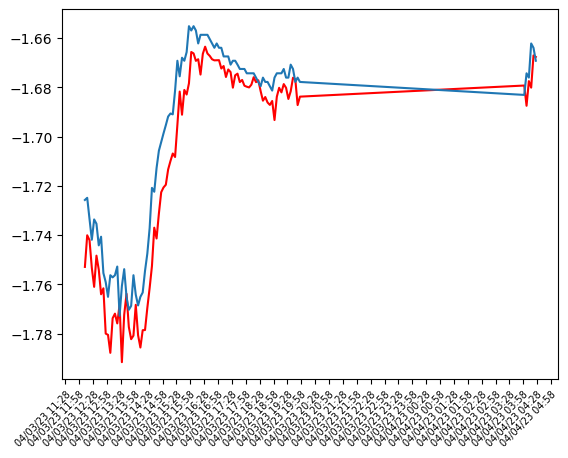

> Training model GatedMLP.
Total trainable params: 978699

Splitting data at a 0.8 ratio: 27944/6986

Fitting dataset.
Before:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64
After:  [[-1.70041633e+00 -1.19231347e+00 -1.67461685e+00 -9.71626856e-02
   1.00000000e-02  1.00426406e+01]
 [-1.69866001e+00 -1.19231347e+00 -1.67011484e+00  2.34561201e+00
   1.00000000e-02  1.01760687e+01]
 [-1.69690369e+00 -1.19231347e+00 -1.66620912e+00  2.17780828e+00
   1.00000000e-02  9.72633263e+00]] dtype= float64

Epoch 1/1; Total epochs: 5/5
GPU: 0.00MB Pinning


437/437 [██████████████████████████████] 00:11 - eta: 00:00, 39.01it/s
437/437 [██████████████████████████████] 00:55 - eta: 00:00,  7.87it/s, loss=0.0003553, err($)=0.01345
110/110 [██████████████████████████████] 00:07 - eta: 00:00, 15.08it/s, val_loss=0.0004159, val_err($)=0.01451



Done in user: 74.03s; sys: 64.25s.



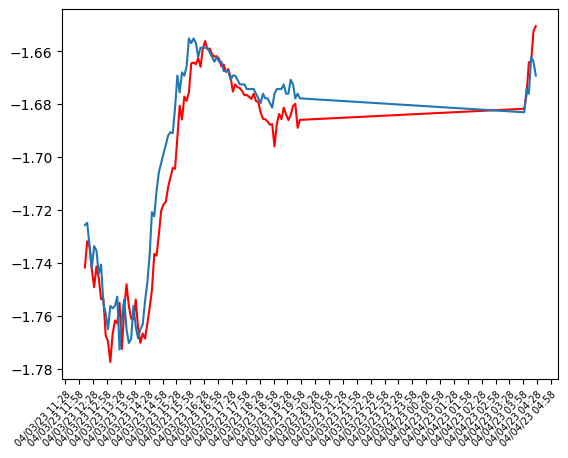

In [8]:

for i in range(4):
    model.standard_train(dataset)
    test()